# Supervised Machine Learning: Regression

## Table of contents

### [1. Libraries and Data importations](#1)
### [2. Data Preparation](#2)

-[ Data cleaning](#2.1)

-[ Data Exploration](#2.2)

### [3. Hypothesis](#3)
### [4. Regression analysis](#4)
-[ Variables reshaping](#4.1)

-[ Spliting (training vs test)](#4.2)

-[ Linear regression](#4.3)
### [5. Model performance](#5)
-[ MSE & R2](#5.1)

-[ Predicted vs real values](#5.2)

-[ Comparing how the regression fits the training set](#5.3)

### [6. Conclusion](#6)

## 1. Libraries and Data importations
<div id='1'></div>

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 

##to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Creating paths to the data folder of the project and to the folder for saving the charts
path_data = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Europe health-deaths analysis\02 Data'
path_viz = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Europe health-deaths analysis\04 Analysis\Visualizations'

# Importing the latest merged dataframe
df = pd.read_pickle(os.path.join(path_data,'Prepared Data','cod_merged_full.pkl'))


## 2. Data Preparation
<div id='2'></div>

### Data cleaning
<div id='2.1'></div>

In [8]:
df.shape

(45692, 114)

In [9]:
df.isnull().sum()

geo_code                                                       0
country_region                                                 0
year                                                           0
sex                                                            0
age                                                            0
                                                           ...  
Too expensive                                              44203
Too expensive or too far to travel or waiting list         44203
Too far to travel                                          44203
Waiting list                                               44203
Wanted to wait and see if problem got better on its own    44203
Length: 114, dtype: int64

All nulll values are either form mismatched scopes from the different datasets, or from unavailble data from Eurostat. The most important column being the aggregate of all causes of deaths, cleaning this column from null values is necessary.

In [11]:
df.dropna(subset=['A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98'])

,geo_code,country_region,year,sex,age,A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98,A15-A19_B90: Tuberculosis,"ACC: Accidents (V01-X59, Y85, Y86)","ACC_OTH: Other accidents (W20-W64, W75-X39, X50-X59, Y86)",A_B: Certain infectious and parasitic diseases (A00-B99),...,Didn't know any good doctor or specialist,"Fear of doctor, hospital, examination or treatment",No time,No unmet needs to declare,Other reason,Too expensive,Too expensive or too far to travel or waiting list,Too far to travel,Waiting list,Wanted to wait and see if problem got better on its own
0,AT,Austria,2011,F,TOTAL,920.47,0.46,24.45,11.02,8.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT,Austria,2011,F,Y_GE65,4051.37,1.96,101.39,51.15,34.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT,Austria,2011,F,Y_LT65,131.62,0.09,5.06,0.90,1.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT,Austria,2011,M,TOTAL,880.37,0.83,35.93,12.84,7.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT,Austria,2011,M,Y_GE65,4402.11,4.03,125.77,53.46,32.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48577,UKN0,Northern Ireland (UK) (NUTS 2021),2018,M,Y_GE65,4308.63,3.61,113.50,26.03,53.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48578,UKN0,Northern Ireland (UK) (NUTS 2021),2018,M,Y_LT65,213.73,0.00,21.03,2.93,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48579,UKN0,Northern Ireland (UK) (NUTS 2021),2018,T,TOTAL,834.56,0.32,30.65,5.06,9.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48580,UKN0,Northern Ireland (UK) (NUTS 2021),2018,T,Y_GE65,4202.75,1.96,116.62,20.91,50.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dups = df.duplicated()
dups.shape # no duplicates found

(45692,)

### Data Exploration
<div id='2.2'></div>

In [14]:
pd.set_option('display.max_rows', None)
df.count()

geo_code                                                                                                        45692
country_region                                                                                                  45692
year                                                                                                            45692
sex                                                                                                             45692
age                                                                                                             45692
A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98                                                        45540
A15-A19_B90: Tuberculosis                                                                                       41193
ACC: Accidents (V01-X59, Y85, Y86)                                                                              45534
ACC_OTH: Other accidents (W20-W64, W75-X39, X50-X59, Y86

Only columns with 5000 rows or more will be used for the regression analysis, meaning all added columns from different datasets other the causes of deaths won't be of use.

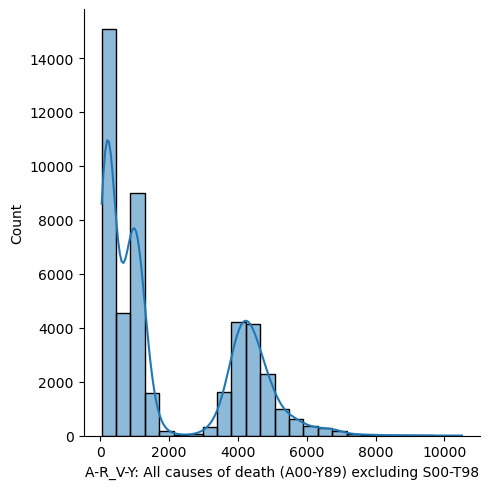

In [16]:
sns.displot(df['A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98'], bins=25, kde =True) # showing extreme values from the main variable

Inside the different causes of deaths, the one about COVID could be of interest in order tjo see whether there is a link between the global number of deaths and the impact of covid.

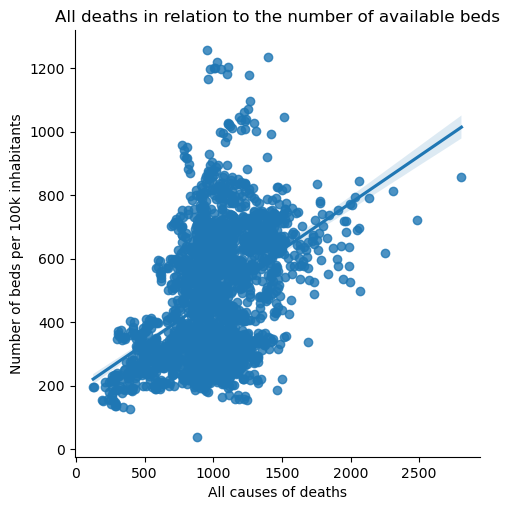

In [18]:
#ploting in a scatter plot with all cause of deaths and covid:

sns.lmplot(x = 'A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98', y='beds_per_100K_inhabitants',data = df)
plt.title('All deaths in relation to the number of available beds')  
plt.xlabel('All causes of deaths')  
plt.ylabel('Number of beds per 100k inhabitants')  
plt.show()

There seems to be a positive relation showing that the more beds there are, the more global deaths there are.

## 3. Hypothesis
<div id='3'></div>

Hypothesis about the impact of the number of beds on global european deaths : 

**If there are more beds, then there are more global deaths (all causes included)**

## 4. Regression analysis
<div id='4'></div>

### Variables reshaping
<div id='4.1'></div>

In [24]:
#creating a new subset and droping Nan values for the missing data on physicians per 100K inhabitants:

df_reg = df[['A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98','beds_per_100K_inhabitants']]
df_reg.isnull().sum()

A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98      152
beds_per_100K_inhabitants                                   43063
dtype: int64

In [25]:
#droping all Nan values

df_reg = df_reg.dropna()
df_reg.shape # there are enough rows for a linear regression analysis !

(2606, 2)

In [26]:
# Reshaping both variables into NumPy arrays

X = df_reg['beds_per_100K_inhabitants'].values.reshape(-1,1) # As the independent variable
y = df_reg['A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98'].values.reshape(-1,1) # all causes of deaths being the dependent variable

In [27]:
X

array([[767.63],
       [767.39],
       [764.46],
       ...,
       [185.56],
       [212.29],
       [203.08]])

In [28]:
y

array([[900.93],
       [932.1 ],
       [927.5 ],
       ...,
       [298.94],
       [384.29],
       [374.28]])

### Spliting (training vs test)
<div id='4.2'></div>

In [30]:
# Spliting data into a training set and a test set (70% - 30%):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear regression
<div id='4.3'></div>

In [32]:
# Creating a regression object

regression = LinearRegression()  #object that will fit onto the training data arrays

In [33]:
# Fitting the training set in the regeression object

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predicting values of y using X

y_predicted = regression.predict(X_test)

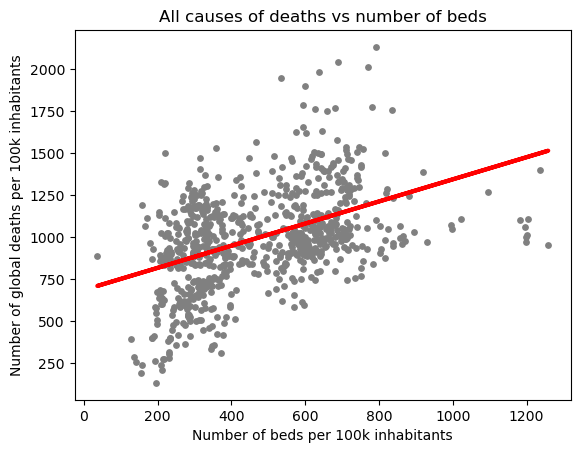

In [35]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('All causes of deaths vs number of beds')
plot_test.xlabel('Number of beds per 100k inhabitants')
plot_test.ylabel('Number of global deaths per 100k inhabitants')
plot_test.show()

## 5. Model performance
<div id='5'></div>

### MSE & R2
<div id='5.1'></div>

In [38]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [39]:
# Printing the model summary statistics in order to evaluate the performamnce of the model:

print('Slope:' ,regression.coef_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65937642]]
Root mean squared error:  66404.61743490963
R2 score:  0.20402910776789707


- The positive slope of 0.6 shows the slightly positive relationship of both variables, both growing as one increases.
- The average squared error of about 66k is significant, proof of a high distance from the points to the regression line: the accurancy of the  model isn't very high.
- Its R-squared value is very low, close to 0, meaning the fit is not good.

### Predicted vs real values
<div id='5.2'></div>

In [42]:
y_predicted

array([[ 872.65546641],
       [ 913.53021079],
       [ 851.3378267 ],
       [ 871.02680665],
       [ 816.48318906],
       [1050.24531804],
       [ 989.72775007],
       [ 788.51244125],
       [1159.33255323],
       [ 852.97308023],
       [ 915.49515252],
       [ 880.34379549],
       [ 816.58868928],
       [ 870.26852377],
       [1005.43409643],
       [ 874.45556404],
       [ 873.13021744],
       [ 864.28797962],
       [ 904.63522286],
       [1188.6550227 ],
       [ 964.78354004],
       [1076.07309248],
       [1089.53755901],
       [ 919.6096614 ],
       [1054.97964075],
       [ 904.04178408],
       [1134.55978107],
       [ 943.46590033],
       [ 840.26689658],
       [ 950.00691443],
       [ 904.18684689],
       [ 909.76517142],
       [ 908.98710724],
       [ 915.00721397],
       [1174.99274325],
       [ 845.31771997],
       [ 894.90282688],
       [1160.74361878],
       [1011.4278281 ],
       [ 980.62835545],
       [ 909.72560884],
       [1014.817

In [43]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,519.27,872.655466
1,470.89,913.530211
2,868.23,851.337827
3,527.33,871.026807
4,675.60,816.483189
5,905.24,1050.245318
6,910.06,989.727750
7,236.80,788.512441
8,1290.30,1159.332553
9,1062.43,852.973080


### Comparing how the regression fits the training set
<div id='5.3'></div>

In [45]:
#Predicitng X_train
y_predicted_train = regression.predict(X_train)

In [46]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65937642]]
Mean squared error:  69510.8265743901
R2 score:  0.18992387851981862


Same comment applies on the training and the test sets, with a slightly better result than on the test set, meaning the model isn't that performant, nor overfitting.

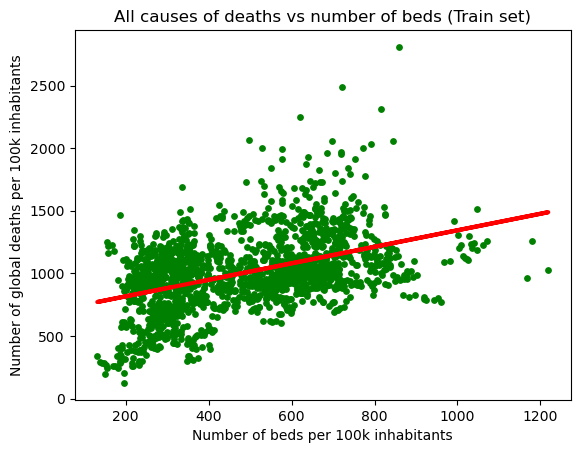

In [49]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('All causes of deaths vs number of beds (Train set)')
plot_test.xlabel('Number of beds per 100k inhabitants')
plot_test.ylabel('Number of global deaths per 100k inhabitants')
plot_test.show()

## Conclusion
<div id='6'></div>

As for the number of physicians, the model isn't accurate enough to allow for a verified hypothesis : The higher the number of beds per 100k inhabitants doesn't equate with more or less deaths (all causes included) in Europe.

Unfortunatly, the lack of data on the other variables on healtcare ressources doesn't allow for further comparisons.

The conclusion isn't very surprising, even though we could have thought before the study that a high number of beds would diminish the number of deaths. 